# Computer vision - Laboratory

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing
2. Edge detection

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# NOTA PARA LOS PROFES: Seria muy interesante hacerles una pistola de comandos por cada librería.

Somewhere we should explain the difference btw rgb and rgba.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

### 2.1 Image processing with different scales and filters

a) Read the image "face.png" and analyse its histogram. What is the histogram representing for an image?

- Visualize the R, G, and B channels of the image.

- Visualize the histogram of a color image.

- Obtain the histogram with 8, 32, 64 and 256 bins. 

- Visualize the histogram of each channel and the gray level image and compare them. Comment their difference (see image bellow as an example of histogram extraction).

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

Original Image Face


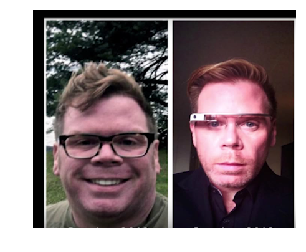

R, G, and B Channels


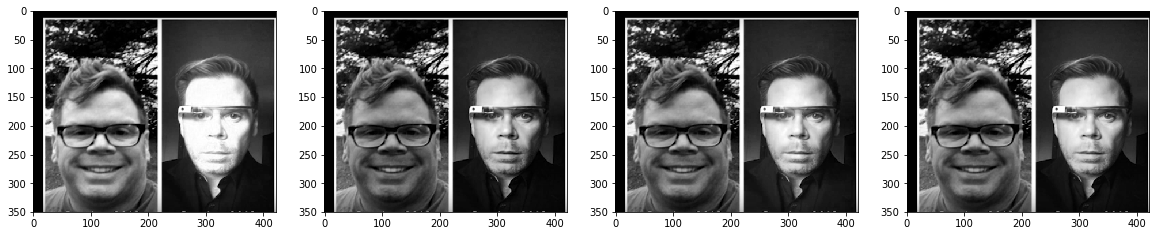

In [1]:
"""Solution"""

# Load the librarys and moduls needed

from skimage import color # RGB > Graylevel convertion 
from skimage import exposure # histogram extraction
from skimage import img_as_float
from skimage import io # read images
from matplotlib import pyplot as plt # visualization 


# a) Read the image "face.png" 
im=io.imread('./images/face.png')

print 'Original Image Face'
plt.axis("off")
plt.imshow(im)
plt.show()

# and obtain its histogram
im_gray=color.rgb2gray(im)
im_r= img_as_float(im[:,:,0])
im_g= img_as_float(im[:,:,1])
im_b= img_as_float(im[:,:,2])


# Visualize the R, G, and B channels of the image
print 'R, G, and B Channels'
fig, ax=plt.subplots(ncols=4, nrows=1, figsize=(20,30))
ax[0].imshow(im_r, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(im_g, cmap='gray', vmin=0, vmax=1)
ax[2].imshow(im_b, cmap='gray', vmin=0, vmax=1)
ax[3].imshow(im_gray, cmap='gray', vmin=0, vmax=1)

plt.show()


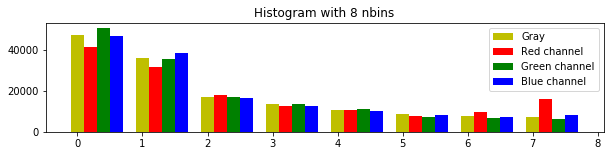

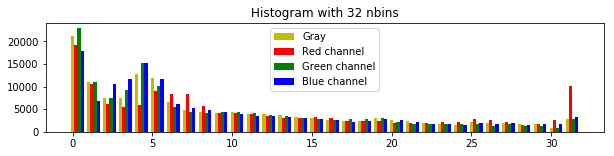

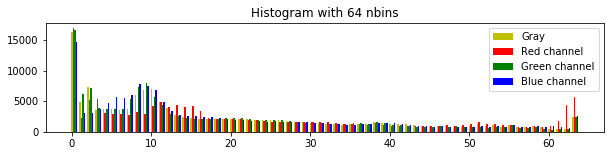

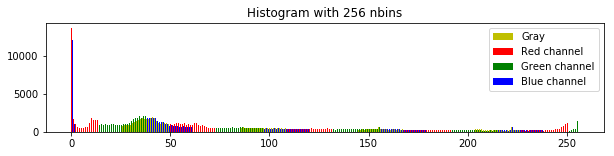

In [2]:
"""Solution"""
# Visualize the histogram of a color image.

# exposure for histogram extraction. `skimage.exposure.histogram(image, nbins=256)`

import numpy as np

# Im_hst Function that given the nbinsSelected represents the histogram

def im_hst(nbinsSelected):
    hst_r,bins_r=exposure.histogram(im_r, nbins=nbinsSelected)
    hst_g,bins_g=exposure.histogram(im_g, nbins=nbinsSelected)
    hst_b,bins_b=exposure.histogram(im_b, nbins=nbinsSelected)
    hst_gray,bins_gray=exposure.histogram(im_gray, nbins=nbinsSelected)

    fig, ax = plt.subplots(figsize=(10,2))

    ind = np.arange(nbinsSelected)  # the x locations for the groups
    width = 0.2       # the width of the bars

    rects_gray = ax.bar(ind, hst_gray, width, color='y')
    rects_r = ax.bar(ind + width, hst_r, width, color='r')
    rects_g = ax.bar(ind + 2*width, hst_g, width, color='g')
    rects_b = ax.bar(ind + 3*width, hst_b, width, color='b')

    ax.legend((rects_gray[0], rects_r[0], rects_g[0], rects_b[0]), 
              ('Gray', 'Red channel', 'Green channel', 'Blue channel'))
    ax.set_title('Histogram with ' + str(nbinsSelected) + ' nbins')
    plt.show()

# We call the function im_hst passing 8, 32, 64 and 256 as nbins parameter
im_hst(8)
im_hst(32)
im_hst(64)
im_hst(256)



b) Read the image `face.png` (a) and convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]`(b). Later, substract the obtained image to the original one and save the new image (c). 

***To make your code legible, the resulted images should be shown in a 3x1 plot, with the following titles: a) 'Original image', b) 'Convolved image' and c) 'Difference with the original image'***

Hint: the `convolve` command belongs to the library `ndimage` of `scipy`. 

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Plot the different images ((a)original image, (b)intermediate and (c)final) on a figure with multiple images. Put titles on the image plots to explain what each image represents to. What does happen if the mask is not normalized? Is the type of the mask important for the convolution? How is the image changed after the convolution? You need to repeat several times the convolution. Moreover, you need to also use bigger masks in order to observe better the effect of it. Present at least 5 experiments commenting the results obtained and their differences.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Gray image:  float64 0.0 1.0
Convolved image:  float64 0.0 0.9957
Difference image:  float64 0.0 0.0


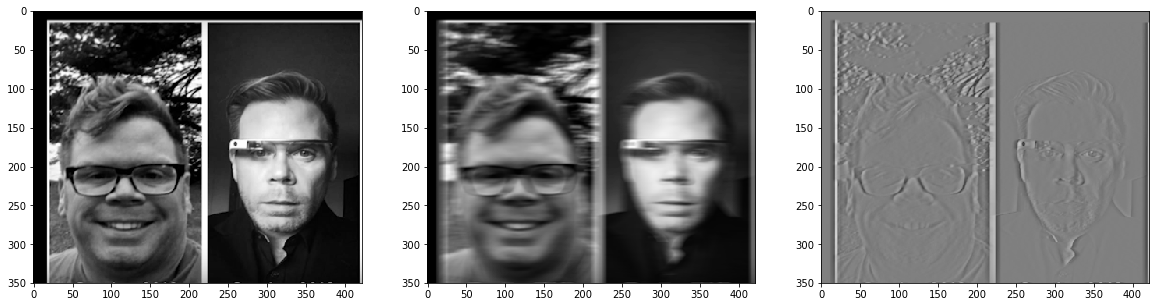

In [3]:
"""Solution"""

from scipy import ndimage
from skimage import color
from matplotlib import pyplot as plt

# Load image. (a) image
im=io.imread('./images/face.png')

# Convert to Graylevel
im_gray=color.rgb2gray(im)
im_res=np.array(im_gray)
im_hres=np.array(im_gray)

# create mask from the given [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1] array
mask_h1d=np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]], dtype='float')
mask_h1d/=np.sum(mask_h1d, axis=1)

# convolve mask with the image. Obtain (b) image
ndimage.convolve(im_gray, mask_h1d, output=im_hres)

# compute the (c) image
im_dif=im_gray-im_res

# Visualize values
print 'Gray image: ', im_gray.dtype, im_gray.min(), im_gray.max()
print 'Convolved image: ', im_hres.dtype, np.round(im_hres.min(),4), np.round(im_hres.max(),4)
print 'Difference image: ', im_dif.dtype, np.round(im_dif.min(),4), np.round(im_dif.max(), 4)

# Visualize images
fig, ax=plt.subplots(ncols=3, nrows=1, figsize=(20,30))
#ax[0,0].imshow(im, cmap='rainbow')
ax[0].imshow(im_gray, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(im_hres, cmap='gray', vmin=0, vmax=1)
ax[2].imshow(im_gray-im_hres, cmap='gray', vmin=-1, vmax=1)

plt.show()

c) Convolve the image with a horizontal one-dimensional mask. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

[[ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]
 [ 0.06666667]]


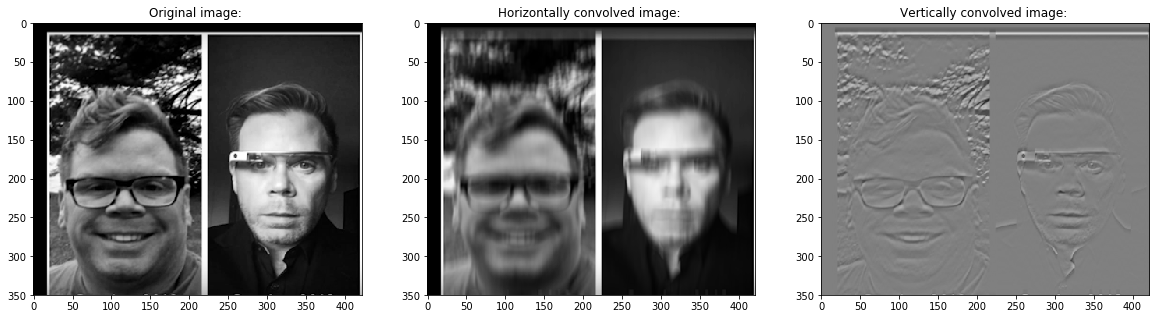

In [4]:
"""Solution"""

mask_v1d=np.transpose(mask_h1d)
print mask_v1d

im_vres=np.array(im_gray)

ndimage.convolve(im_gray, mask_v1d, output=im_vres)
im_vdif=im_gray-im_vres

fig, ax=plt.subplots(ncols=3, nrows=1, figsize=(20,30))
ax[0].imshow(im_gray, cmap='gray', vmin=0, vmax=1)
ax[0].set_title('Original image: ')
ax[1].imshow(im_vres, cmap='gray', vmin=0, vmax=1)
ax[1].set_title('Horizontally convolved image: ')
ax[2].imshow(im_vdif, cmap='gray', vmin=-1, vmax=1)
ax[2].set_title('Vertically convolved image: ')

plt.show()

d) Convolve the original image with a uniform `two-dimensional` mask, following the one-dimension mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

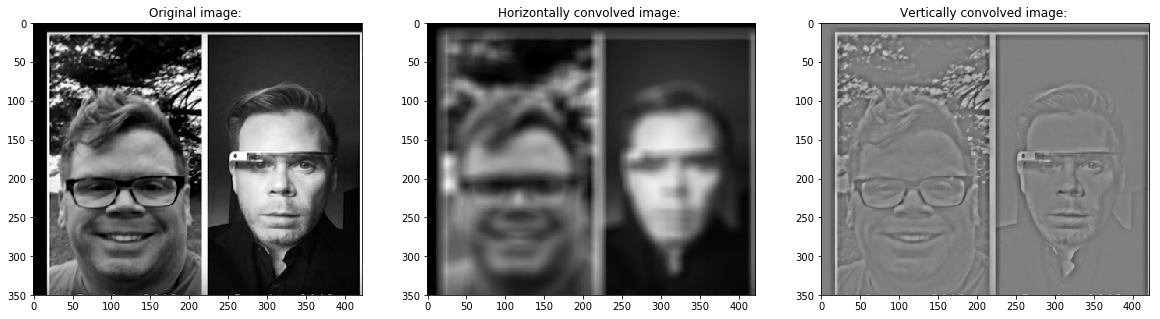

In [5]:
"""Solution:"""

mask_2d=np.outer(mask_h1d, mask_v1d)
mask_2d=mask_2d/np.sum(np.sum(mask_2d))

im_2dres=np.array(im_gray)

ndimage.convolve(im_gray, mask_2d, output=im_2dres)
im_2ddif=im_gray-im_2dres

fig, ax=plt.subplots(ncols=3, nrows=1, figsize=(20,30))
ax[0].imshow(im_gray, cmap='gray', vmin=0, vmax=1)
ax[0].set_title('Original image: ')
ax[1].imshow(im_2dres, cmap='gray', vmin=0, vmax=1)
ax[1].set_title('Horizontally convolved image: ')
ax[2].imshow(im_2ddif, cmap='gray', vmin=-1, vmax=1)
ax[2].set_title('Vertically convolved image: ')

plt.show()

e) Can we convolve a color image? 

What is the difference when applying a convolution channel by channel and when the color image is convolved? Implement it, visualize the 3 images (a, b and c) and comment the results obtained. 

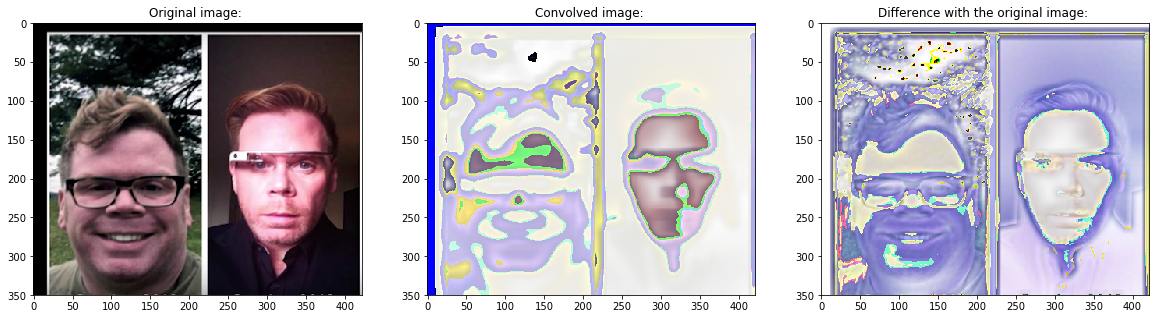

In [6]:
"""Solution: color image convolved by creating a 3 channel mask"""

im_2dres=np.array(im)
mask_2d_color=np.zeros((mask_2d.shape[0], mask_2d.shape[1], 3))

mask_2d_color[:,:,0]=mask_2d
mask_2d_color[:,:,1]=mask_2d
mask_2d_color[:,:,2]=mask_2d

ndimage.convolve(im, mask_2d_color, output=im_2dres)
im_2ddif=im-im_2dres

fig, ax=plt.subplots(ncols=3, nrows=1, figsize=(20,30))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=1)
ax[0].set_title('Original image: ')
ax[1].imshow(im_2dres, cmap='gray', vmin=0, vmax=1)
ax[1].set_title('Convolved image: ')
ax[2].imshow(im_2ddif, cmap='gray', vmin=-1, vmax=1)
ax[2].set_title('Difference with the original image: ')

plt.show()

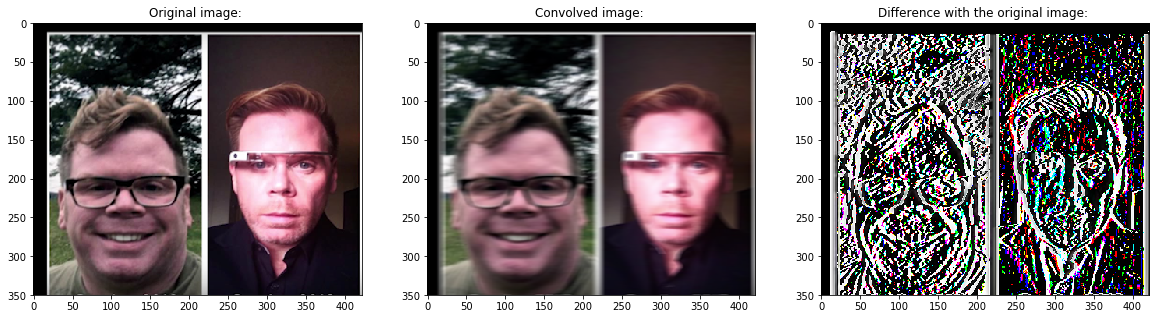

In [7]:
"""Solution ***convolution channel by channel***:"""  

from skimage import img_as_float
from scipy import ndimage

def conv_color(im, mask_2d):
    
    im_r=img_as_float(im[:,:,0])
    im_g=img_as_float(im[:,:,1])
    im_b=img_as_float(im[:,:,2])

    im_2dres_r=np.array(im_r)
    im_2dres_g=np.array(im_g)
    im_2dres_b=np.array(im_b)

    ndimage.convolve(im_r, mask_2d, output=im_2dres_r)
    im_2ddif_r=im_r-im_2dres_r
    ndimage.convolve(im_g, mask_2d, output=im_2dres_g)
    im_2ddif_g=im_g-im_2dres_g
    ndimage.convolve(im_b, mask_2d, output=im_2dres_b)
    im_2ddif_b=im_b-im_2dres_b

    im_2dres=np.zeros((im.shape[0], im.shape[1], 3))

    im_2dres=img_as_float(im_2dres)
    im_2dres[:,:,0]=im_2dres_r
    im_2dres[:,:,1]=im_2dres_g
    im_2dres[:,:,2]=im_2dres_b

    return im_2dres 


mask_2d=np.array([[1,1,1,1,1,1,1,1,1,1]], dtype='float')
mask_2d/=mask_2d.sum()

im_2dres=conv_color(im, mask_2d)
im_2ddif=np.copy(im_2dres)
im_2ddif=color.rgba2rgb(im)-im_2dres

fig, ax=plt.subplots(ncols=3, nrows=1, figsize=(20,30))
ax[0].imshow(im, vmin=0, vmax=1)
ax[0].set_title('Original image: ')
ax[1].imshow(im_2dres, vmin=0, vmax=1)
ax[1].set_title('Convolved image: ')
ax[2].imshow(im_2ddif, vmin=-1, vmax=1)
ax[2].set_title('Difference with the original image: ')

plt.show()

Given a color image (im), what is the difference between ***a*** and ***b*** ?
   
*** a) ***

im_2=np.array(im, dtype='float')


*** b) ***

im_2=np.array(im)


im_2=img_as_float(im_2)

f) Change the size of the image a) reducing it 10 times ***and*** b) augmenting it two times. 

Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment how. 

Apply the convolution on the three images with the same two dimensional uniform mask and comment the results.
Note: Observe what is the output of the command `resize`.


Original image, reducing it 10 times and augmenting it two times.


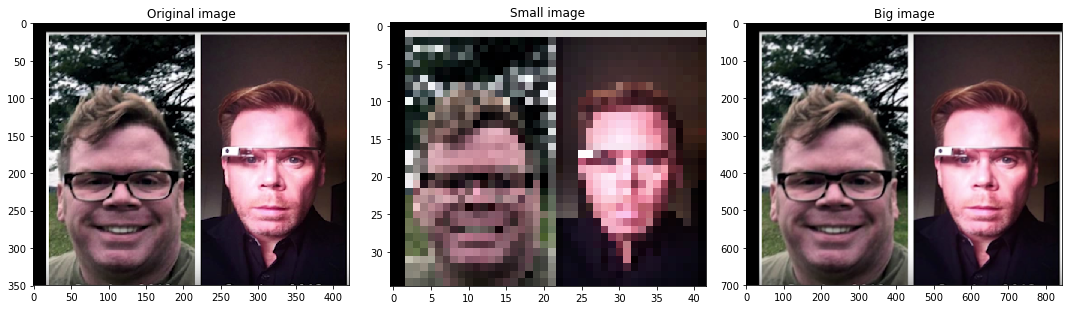

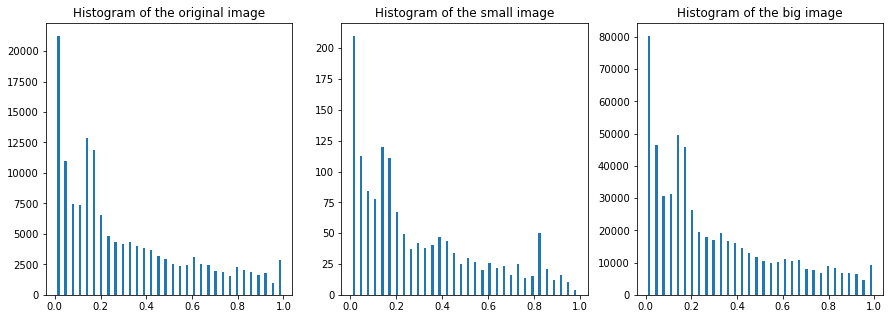

In [17]:
"""Solution"""
from skimage.transform import resize

nbins = 32

# Load image. (a) image
im=io.imread('./images/face.png')

# resize image : divide row and col by 10
im_small=resize(im, (im.shape[0]/10,im.shape[1]/10))
# resize image : multiply row and col by 10
im_big=resize(im, (im.shape[0]*2,im.shape[1]*2))

# visualize images
print 'Original image, reducing it 10 times and augmenting it two times.'
plt.figure(figsize=(15,25))
plt.subplot(131), io.imshow(im, cmap='rainbow')
plt.title('Original image')
plt.subplot(132), io.imshow(im_small, cmap='rainbow', vmin=0, vmax=1)
plt.title('Small image')
plt.subplot(133), io.imshow(im_big, cmap='rainbow', vmin=0, vmax=1)
plt.title('Big image')
plt.show()

hst_im=exposure.histogram(color.rgb2gray(im),nbins)
hst_small=exposure.histogram(color.rgb2gray(im_small),nbins) 
hst_big=exposure.histogram(color.rgb2gray(im_big),nbins) 

width=0.01
plt.figure(figsize=(15,5))
plt.subplot(131), plt.bar(hst_im[1], hst_im[0], width=width)
plt.title('Histogram of the original image')
plt.subplot(132), plt.bar(hst_small[1], hst_small[0], width=width)
plt.title('Histogram of the small image')
plt.subplot(133), plt.bar(hst_big[1], hst_big[0], width=width)
plt.title('Histogram of the big image')
plt.show()

Convolved images over: Original image, the reduced 10 times and augmented two times.


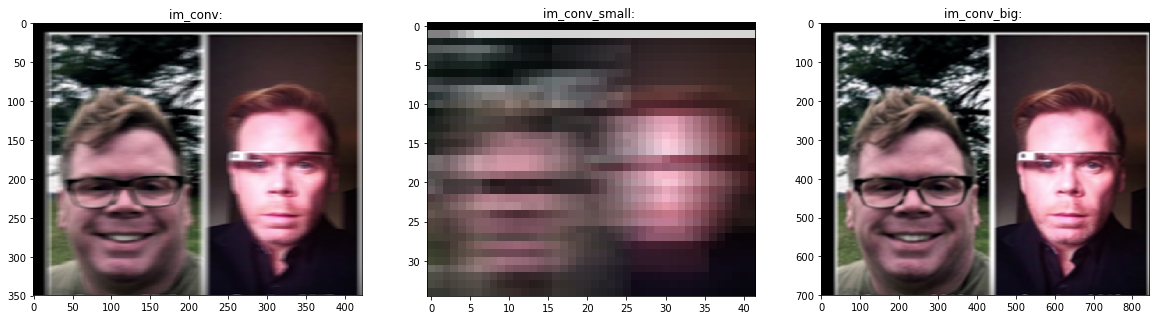

In [14]:
"""Solution"""

# convolve images using the conv_color function defined with the already introduced mask_2d
im_conv=conv_color(im, mask_2d)
im_conv_small=conv_color(im_small, mask_2d)
im_conv_big=conv_color(im_big, mask_2d)

print 'Convolved images over: Original image, the reduced 10 times and augmented two times.'

fig, ax=plt.subplots(ncols=3, nrows=1, figsize=(20,30))
ax[0].imshow(im_conv, vmin=0, vmax=1)
ax[0].set_title('im_conv: ')
ax[1].imshow(im_conv_small, vmin=0, vmax=1)
ax[1].set_title('im_conv_small: ')
ax[2].imshow(im_conv_big, vmin=-1, vmax=1)
ax[2].set_title('im_conv_big: ')
plt.show()



#### 2.2 Image processing with weighting and non-linear filters

b)	Apply the necessary smoothing on the image in order to remove the line in the middle. Present two possible solutions.

Hint: Substract the original image to the smoothed one, with the aim of showing its difference (keep in mind that some of the pixels could have gotten a negative value ) 


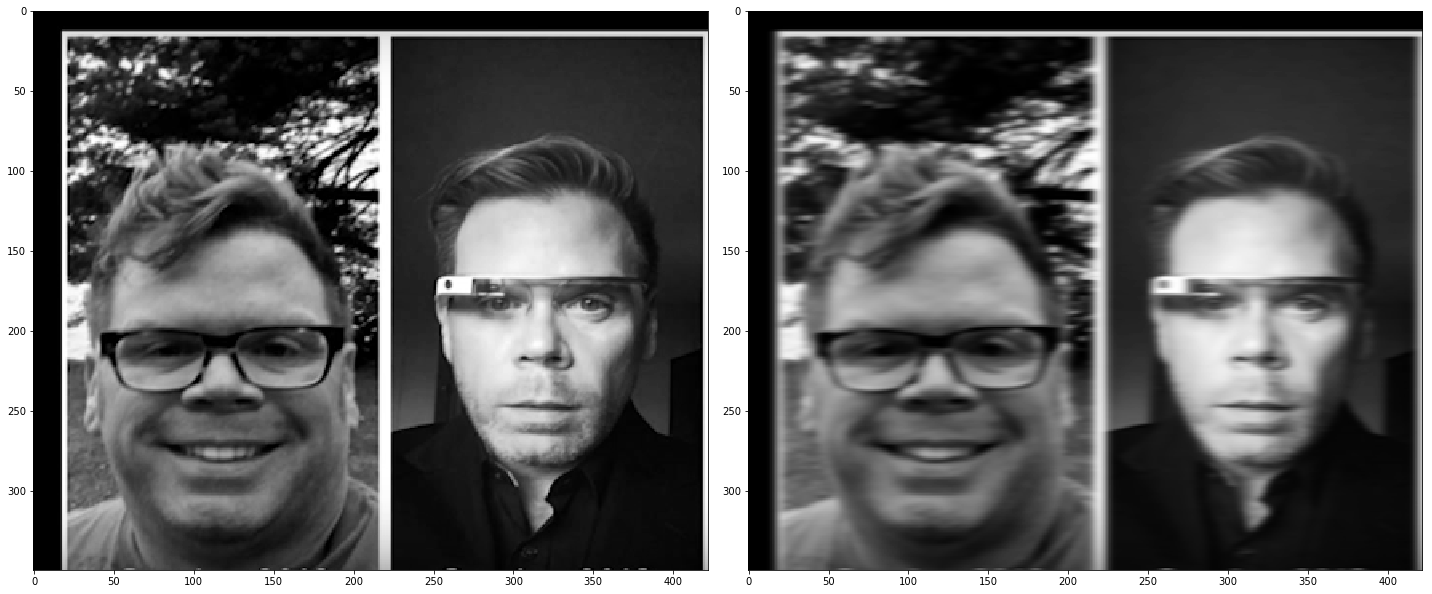

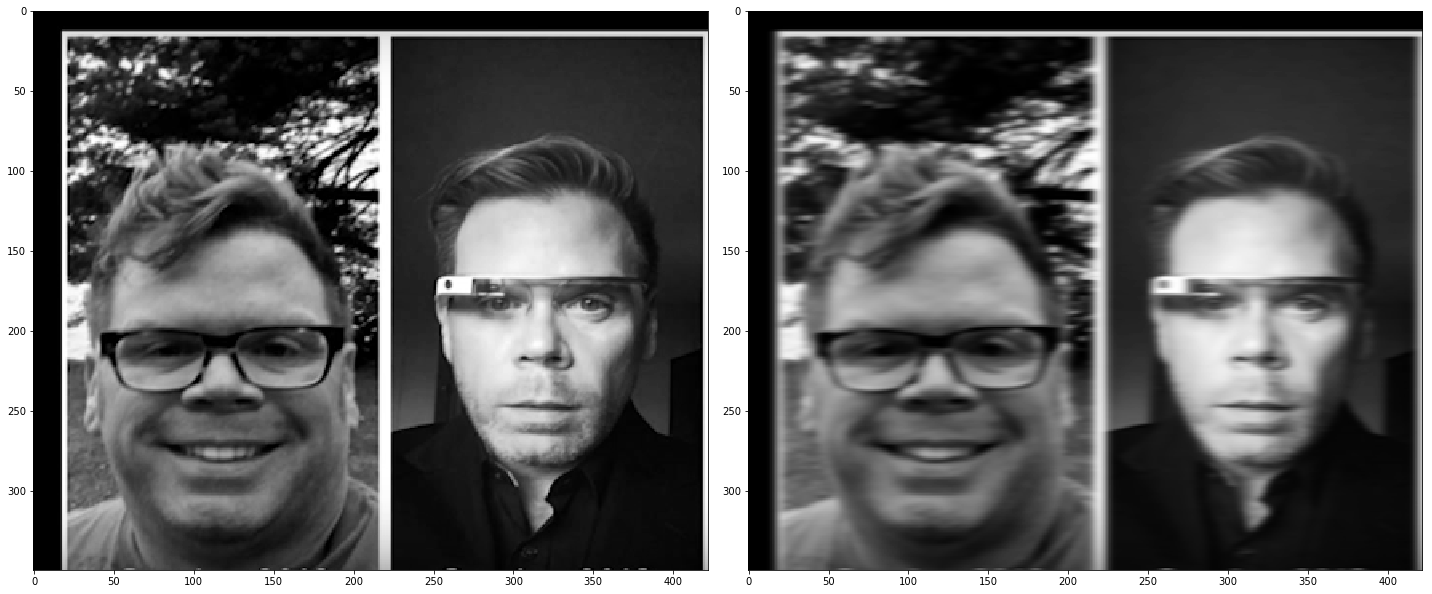

In [19]:
"""Solution"""

from skimage import img_as_float

smoothedImGray1D_hor=img_as_float(im_gray)

# create horitzontal mask [1 1 1]
mask_h1d=np.array([[1,1,1]], dtype='float')
mask_h1d/=mask_h1d.sum()


for i in range (10):
    smoothedImGray1D_hor=ndimage.convolve(smoothedImGray1D_hor,mask_h1d)

plt.figure(figsize=(20,10))
plt.subplot(121), io.imshow(im_gray, vmin=0, vmax=1)
plt.subplot(122), io.imshow(smoothedImGray1D_hor, vmin=0, vmax=1)
plt.show()


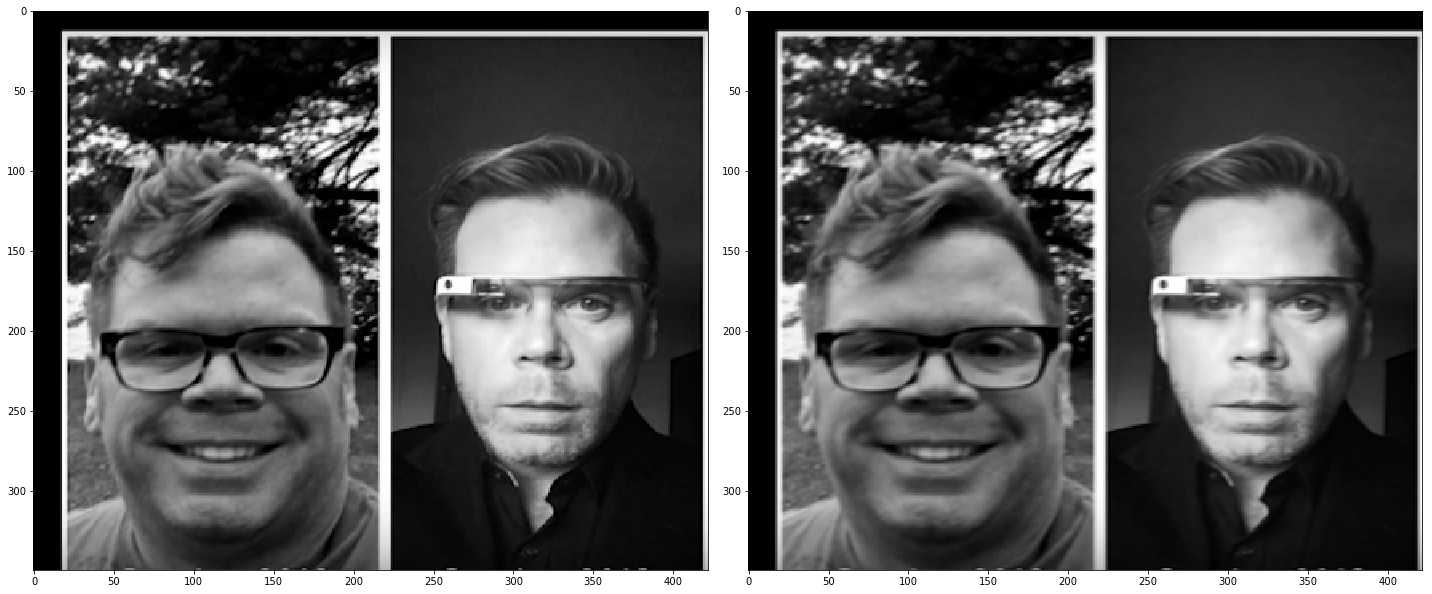

In [20]:
"""Solution"""
smoothedImGray1D_hor=im_gray
mask_1hd=np.array([1,1,1])

smoothedImGray1D_hor=ndimage.convolve(smoothedImGray1D_hor,mask_h1d)

plt.figure(figsize=(20,10))
plt.subplot(121), io.imshow(im_gray, vmin=0, vmax=1)
plt.subplot(122), io.imshow(smoothedImGray1D_hor, vmin=0, vmax=1)
plt.show()


b) Generate a Gaussian kernel and apply ...

**TRADUCIR:** a) Aplicar el kernel (núcleo) de la Gaussiana  sobre alguna de las imágenes seleccionadas para el Ejercicio 2.1.  Repetir 100 veces la suavización para ver mejor el efecto. Comparar con la suavización con filtro de la media. Utilizar diferentes valores de sigma y comentar su efecto. ¿Qué valor de sigma consideráis más adecuado para suavizar los detalles de esa imagen en concreto, y quedarse con los objetos y estructuras principales?



In [ ]:
"""Solution"""
import skimage
from skimage import filters
from skimage.morphology import disk

gaussiansmoothedimage=filters.gaussian(im_gray, sigma=1)
gaussiansmoothedimage2=filters.gaussian(im_gray, sigma=10)
mediansmoothedimage=filters.median(skimage.img_as_ubyte(im_gray),disk(11))
                                           #selem=[[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1]])


plt.figure(figsize=(20,10))
plt.subplot(334), io.imshow(im_gray)
plt.title('Original gray image')
plt.subplot(332), io.imshow(gaussiansmoothedimage)
plt.title('Smoothed with a Gaussian')
plt.subplot(333), io.imshow(gaussiansmoothedimage-im_gray)
plt.title('Difference btw original and smoothing')
plt.subplot(335), io.imshow(gaussiansmoothedimage2)
plt.title('Smoothed with a big Gaussian')
plt.subplot(336), io.imshow(gaussiansmoothedimage2-im_gray)
plt.title('Difference btw original and smoothing')
plt.subplot(337), io.imshow(mediansmoothedimage, vmin=0, vmax=255)
plt.title('Smoothed with a Median')
plt.subplot(339), io.imshow(mediansmoothedimage-im_gray)
plt.title('Difference btw original and smoothing')
plt.show()

**(Optional)** Apply the smoothing on some other images and presnt their results.

### 2.3 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session. Also, find the optimal parameteres for each of them.

Use subplot and title to visualize the results.

Which is the best countour detection technique? 

Which are the optimal parameters for this image? 

Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

Optional: Superimpose the contours over the image.

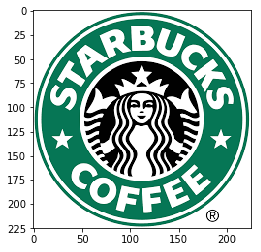

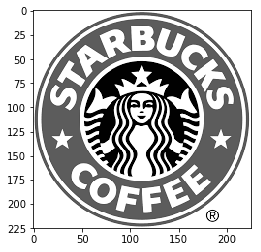

In [34]:
"""Solution"""

# Filters Roberts Theory
#skimage.filters.roberts(image[, mask])	Find the edge magnitude using Roberts’ cross operator.
#skimage.filters.roberts_neg_diag(image[, mask])	Find the cross edges of an image using the Roberts’ Cross operator.
#skimage.filters.roberts_pos_diag(image[, mask])	Find the cross edges of an image using Roberts’ cross operator.

from skimage.color import rgb2gray
from skimage import filters

im=io.imread('images/logo.png')
plt.imshow(im)
plt.show()
imGray=rgb2gray(im)
plt.imshow(imGray,cmap='gray')
plt.show()

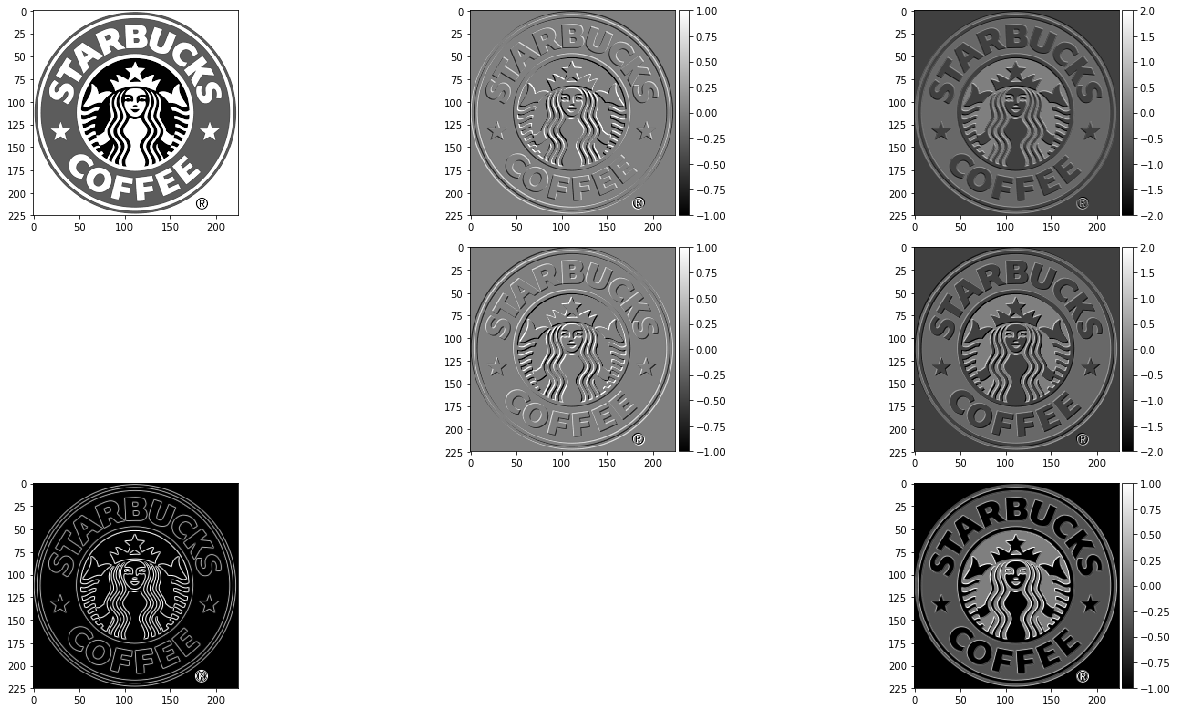

In [46]:
"""Solution"""

# 3 Ways of applying the roberts
#a)
roberts_neg_diag=filters.roberts_neg_diag(imGray)
#b)
roberts_pos_diag=filters.roberts_pos_diag(imGray)
#c)
roberts=filters.roberts(imGray)

plt.figure(figsize=(20,10))
plt.subplot(331), io.imshow(imGray)
plt.subplot(332), io.imshow(roberts_neg_diag, cmap='gray')
plt.subplot(333), io.imshow(roberts_neg_diag-imGray, cmap='gray')

plt.subplot(335), io.imshow(roberts_pos_diag, cmap='gray')
plt.subplot(336), io.imshow(roberts_pos_diag-imGray, cmap='gray')

plt.subplot(337), io.imshow(roberts, cmap='gray')
plt.subplot(339), io.imshow(roberts-imGray, cmap='gray')
plt.show()

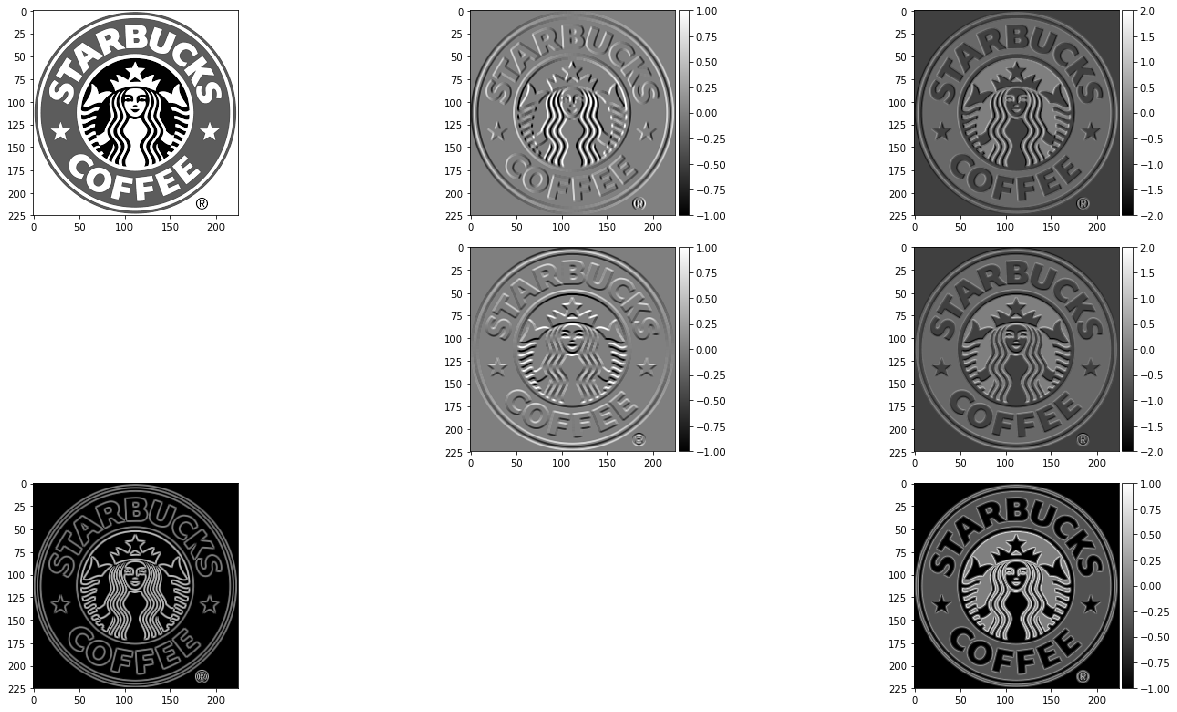

In [45]:
"""Solution ***prewitt***"""
#skimage.filters.prewitt(image[, mask])	Find the edge magnitude using the Prewitt transform.
#skimage.filters.prewitt_h(image[, mask])	Find the horizontal edges of an image using the Prewitt transform.

prewitt_v=filters.prewitt_v(imGray)
prewitt_h=filters.prewitt_h(imGray)
prewitt=filters.prewitt(imGray)

plt.figure(figsize=(20,10))
plt.subplot(331), io.imshow(imGray)
plt.subplot(332), io.imshow(prewitt_v, cmap='gray')
plt.subplot(333), io.imshow(prewitt_v-imGray, cmap='gray')
#plt.show()
plt.subplot(335), io.imshow(prewitt_h, cmap='gray')
plt.subplot(336), io.imshow(prewitt_h-imGray, cmap='gray')
#plt.show()
plt.subplot(337), io.imshow(prewitt, cmap='gray')
plt.subplot(339), io.imshow(prewitt-imGray, cmap='gray')
plt.show()

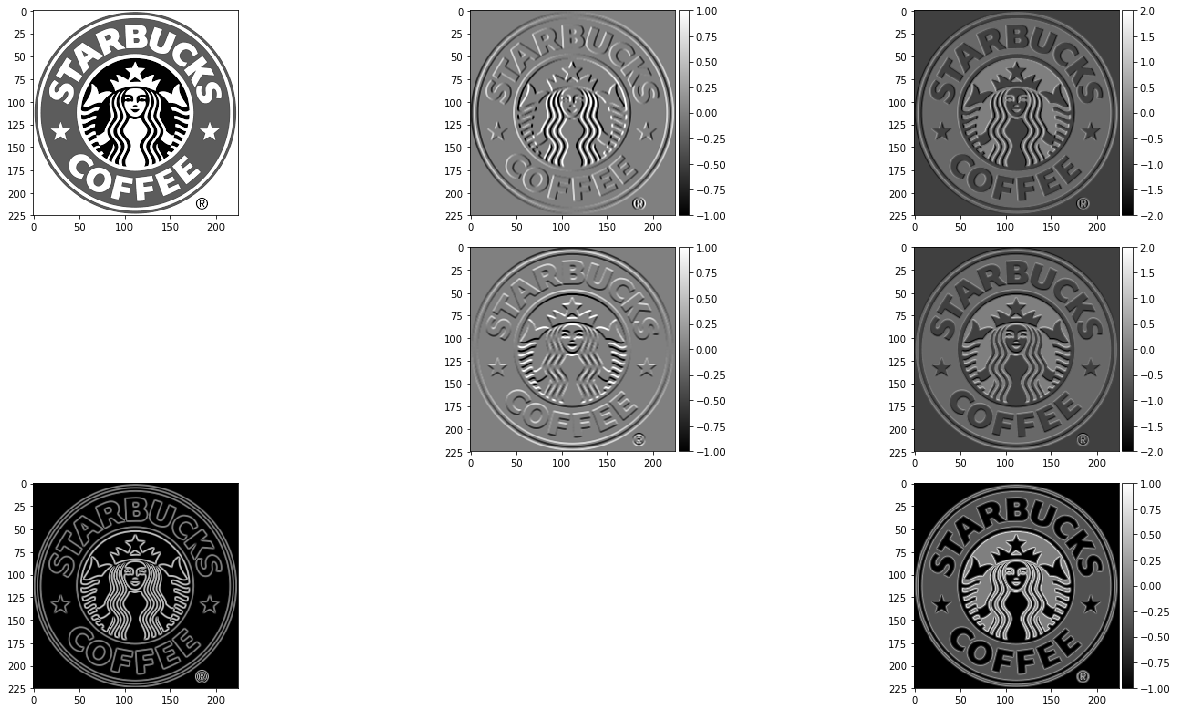

In [47]:
"""Solution ***sobel***"""
#skimage.filters.sobel(image[, mask])	Find the edge magnitude using the Sobel transform.
#skimage.filters.sobel_h(image[, mask])	Find the horizontal edges of an image using the Sobel transform.
#skimage.filters.sobel_v(image[, mask])	Find the vertical edges of an image using the Sobel transform.

sobel_v=filters.sobel_v(imGray)
sobel_h=filters.sobel_h(imGray)
sobel=filters.sobel(imGray)

plt.figure(figsize=(20,10))
plt.subplot(331), io.imshow(imGray)
plt.subplot(332), io.imshow(sobel_v, cmap='gray')
plt.subplot(333), io.imshow(sobel_v-imGray, cmap='gray')
#plt.show()
plt.subplot(335), io.imshow(sobel_h, cmap='gray')
plt.subplot(336), io.imshow(sobel_h-imGray, cmap='gray')
#plt.show()
plt.subplot(337), io.imshow(sobel, cmap='gray')
plt.subplot(339), io.imshow(sobel-imGray, cmap='gray')
plt.show()

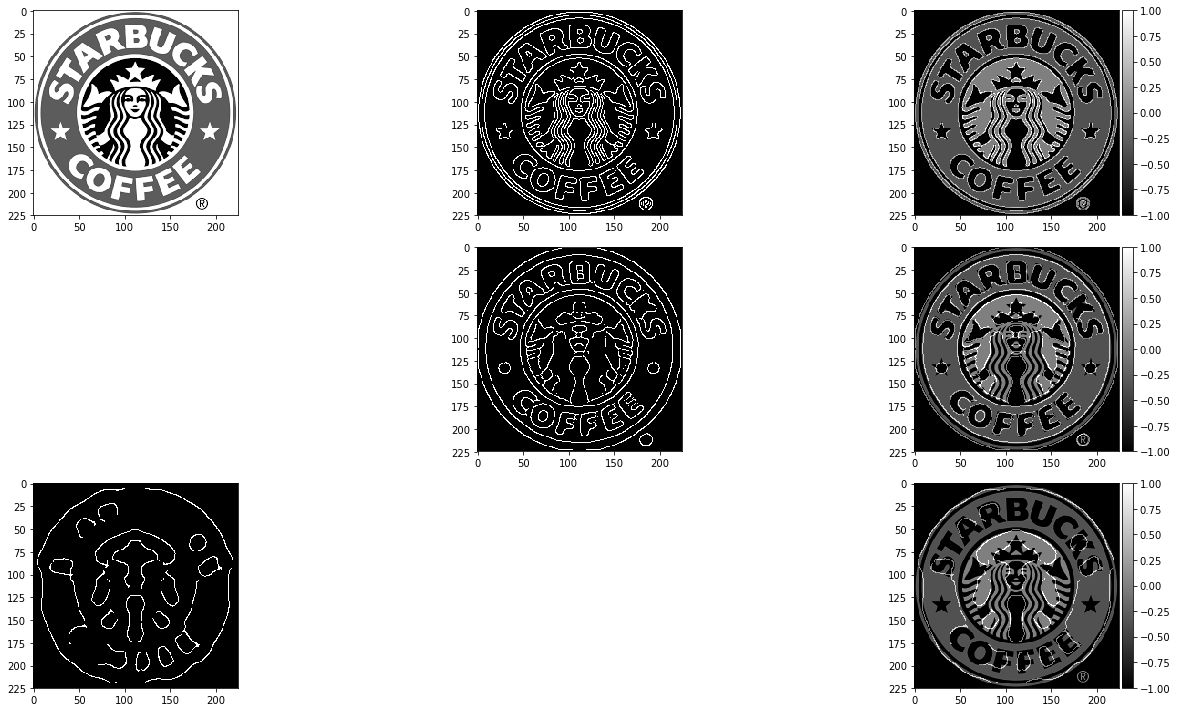

In [49]:
"""Solution **canny"""
# skimage.feature.canny(image, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)

from skimage import feature

edgesCannysigma1 = feature.canny(imGray)
edgesCannysigma3 = feature.canny(imGray, sigma=3)
edgesCannysigma6 = feature.canny(imGray, sigma=6)

plt.figure(figsize=(20,10))
plt.subplot(331), io.imshow(imGray)
plt.subplot(332), io.imshow(edgesCannysigma1)
plt.subplot(333), io.imshow(edgesCannysigma1-imGray, cmap='gray')
#plt.show()
plt.subplot(335), io.imshow(edgesCannysigma3)
plt.subplot(336), io.imshow(edgesCannysigma3-imGray, cmap='gray')
#plt.show()
plt.subplot(337), io.imshow(edgesCannysigma6)
plt.subplot(339), io.imshow(edgesCannysigma6-imGray, cmap='gray')
plt.show()

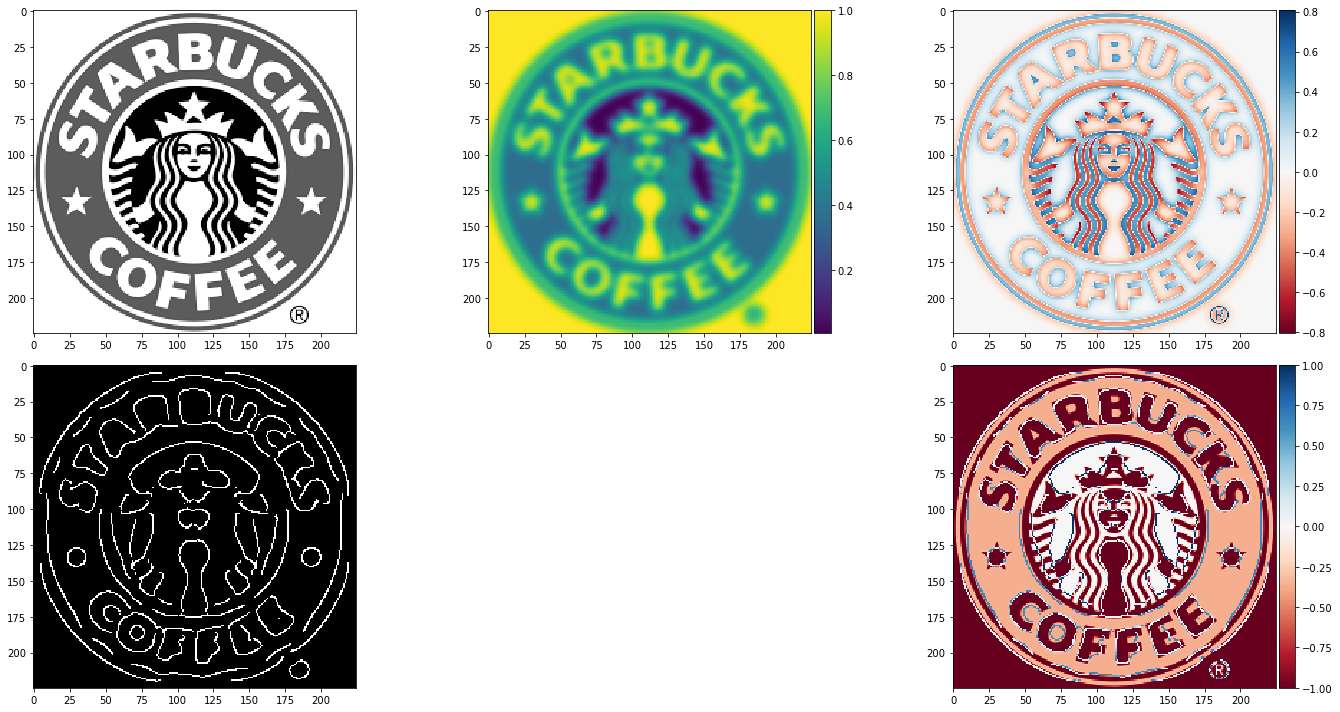

In [52]:
"""Solution"""
from skimage import feature

# skimage.filters.gaussian(image[, sigma, …])	Multi-dimensional Gaussian filter.
gaussiansmoothedimage= filters.gaussian(imGray, sigma=3)

cannyaftersmoothing= feature.canny(gaussiansmoothedimage, sigma=3)

plt.figure(figsize=(20,10))
plt.subplot(231), io.imshow(imGray)
plt.subplot(232), io.imshow(gaussiansmoothedimage)
plt.subplot(233), io.imshow(gaussiansmoothedimage-imGray)
#plt.show()
plt.subplot(234), io.imshow(cannyaftersmoothing)
plt.subplot(236), io.imshow(cannyaftersmoothing-imGray)
plt.show()

d) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


### 2.4 Applying smoothing in order to obtain hybrid images

a) Given `einstein.jpg` and `monroe.jpg` images, compute the hybrid image and visualize it.

By applying smoothing over an image I, we apply a `low-pass` filter. The resutled image can be called L(I). If we substract from the original image the filtered one, we obtain the high frequencies from the image, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

Apply fspecial('gaussian,hsize,sigma') witht he formula hsize=4*sigma+1. What does hsize mean?

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

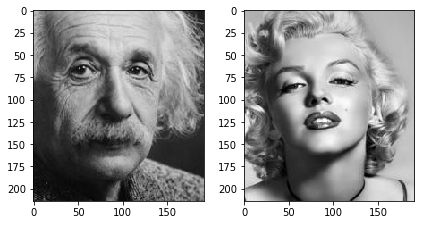

In [56]:
"""Solution"""

einstein=io.imread("./images/einstein.jpg")
monroe=io.imread("./images/monro.jpg")
plt.figure()
plt.subplot(121) , io.imshow(einstein)
plt.subplot(122) , io.imshow(monroe)
plt.show()

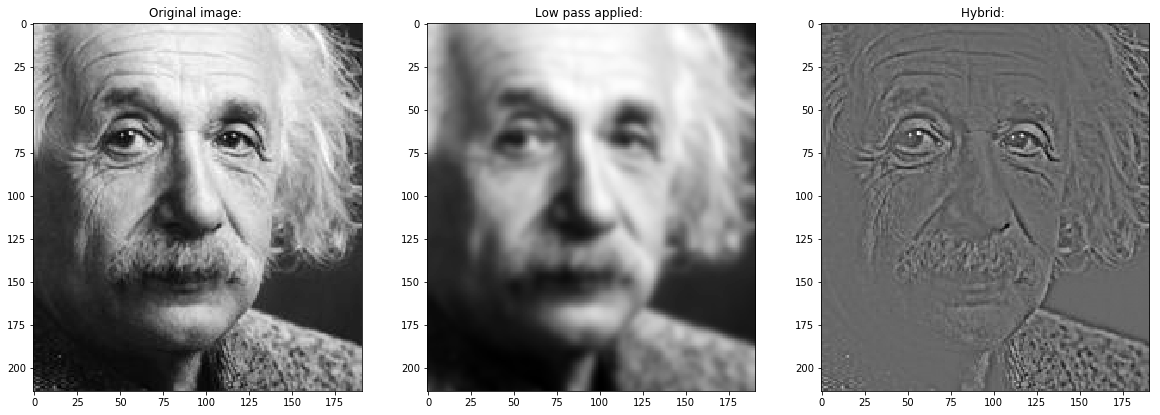

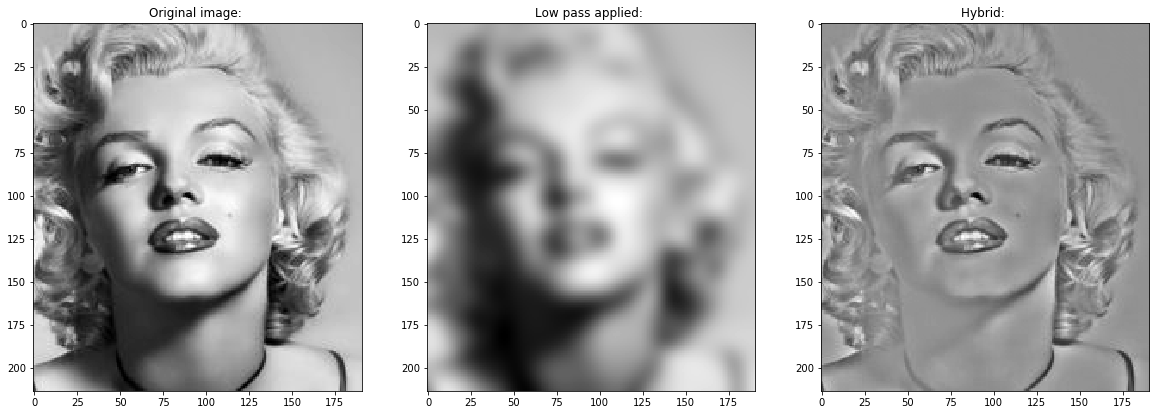

In [63]:
"""Solution"""

sigma_einstein=2
lf_einstein=255*skimage.filters.gaussian(einstein,sigma_einstein)
hf_einstein = einstein - lf_einstein

sigma_monroe=5
lf_monroe=255*skimage.filters.gaussian(monroe,sigma_monroe)
hf_monroe = monroe - lf_monroe


fig, ax=plt.subplots(ncols=3, nrows=1, figsize=(20,30))
ax[0].imshow(einstein,cmap='gray')
ax[0].set_title('Original image: ')
ax[1].imshow(lf_einstein, cmap='gray')
ax[1].set_title('Low pass applied: ')
ax[2].imshow(hf_einstein,cmap='gray')
ax[2].set_title('Hybrid: ')
plt.show()

fig, ax=plt.subplots(ncols=3, nrows=1, figsize=(20,30))
ax[0].imshow(monroe,cmap='gray')
ax[0].set_title('Original image: ')
ax[1].imshow(lf_monroe, cmap='gray')
ax[1].set_title('Low pass applied: ')
ax[2].imshow(hf_monroe,cmap='gray')
ax[2].set_title('Hybrid: ')
plt.show()

b) Combine both hybrid images and visualize them. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. To do so, rescale the image and comment the results. Present the different visualizations of the experiment performed.

Optional : compute hybrid images from other images. Apply it over color images.

333.661952938
131.936340056
238.578790947
228


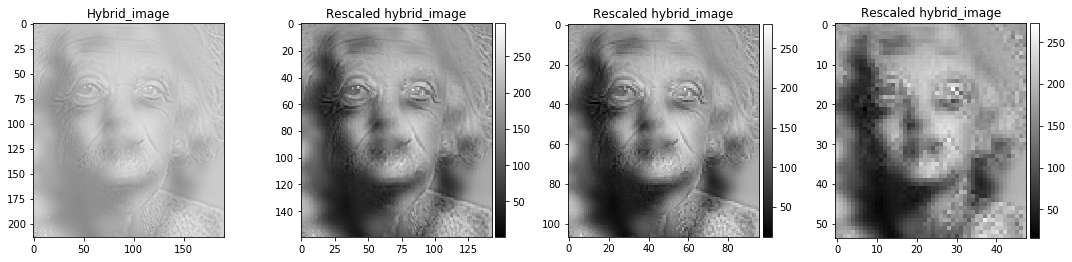

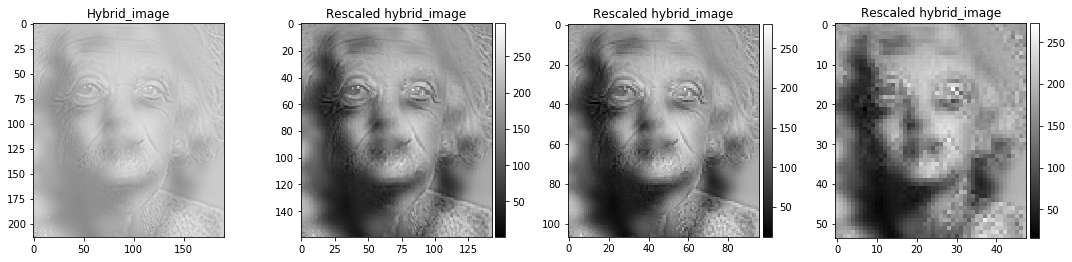

In [65]:
"""Solution"""

hybrid_image=hf_einstein+lf_monroe

print hybrid_image.max()
print hf_einstein.max() #tiene valores negativos
print lf_monroe.max() #entre 0 y 1
print einstein.max()

from skimage.transform import rescale

hybrid_image2=rescale(hybrid_image,0.75)
hybrid_image3=rescale(hybrid_image,0.5)
hybrid_image4=rescale(hybrid_image,0.25)

plt.figure(figsize=(15,25))
plt.subplot(1,4,1)
plt.title('Hybrid_image')
io.imshow(hybrid_image, cmap='gray')
plt.subplot(1,4,2)
plt.title('Rescaled hybrid_image')
io.imshow(hybrid_image2, cmap='gray')
plt.subplot(1,4,3)
plt.title('Rescaled hybrid_image')
io.imshow(hybrid_image3, cmap='gray')
plt.subplot(1,4,4)
plt.title('Rescaled hybrid_image')
io.imshow(hybrid_image4, cmap='gray')
plt.show()

## 2.5 Anonimization of videos

One of the important problems in Computer Vision as a science that manage data (images and videos) is the anonimization of persons in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg



Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


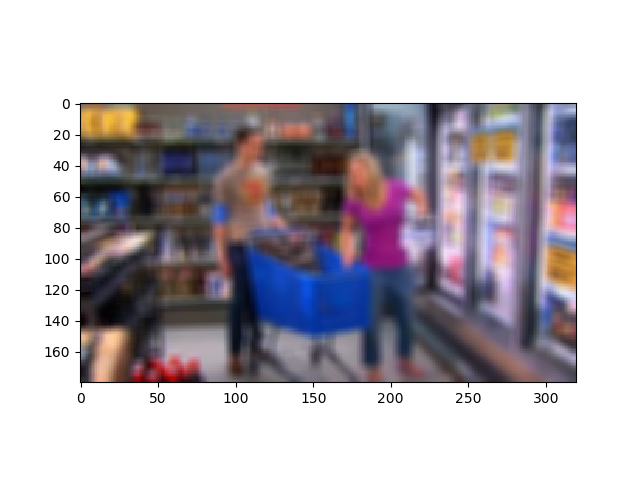

In [78]:
"""Solution, showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print 'Info about the animation:'
print 'Num Frames:' + str(frames)
print 'Images height:' + str(height)
print 'Images width:' + str(width)

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale)
        
print 'The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape)


%matplotlib nbagg

def updatefig1(i): 
    #im.set_array(ic_small[:,:,:,i]) #showing the small image
    im.set_array(conv_color(ic_small[:,:,:,i], mask_2d))   
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


In [77]:
"""Solution, showing 2 videos per annimation : original + blurred"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print 'Info about the animation:'
print 'Num Frames:' + str(frames)
print 'Images height:' + str(height)
print 'Images width:' + str(width)

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale)
        
print 'The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,3))
img0=ic_small[:,:,:,0]
imm1=ax1.imshow(img0)
imm2=ax2.imshow(img0)
plt.show()

# 
# the framesD matrix is created by 0s
#
%matplotlib nbagg
mask_2d=np.ones((7,7)) # 7 by 7 mask with all ones
mask_2d/=mask_2d.sum() 

def updfig2(i):
    imm1.set_array(ic_small[:,:,:,i]) # we plot the original image just with the resize
    imm2.set_array(conv_color(ic_small[:,:,:,i], mask_2d)) # we plot the convolved image with the mask_2d
    plt.draw()
    return imm1,imm2,

ani = animation.FuncAnimation(fig, updfig2, interval=2, 
                              blit=True, repeat=False, frames=frames)
plt.show()

Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)
